Ora cerchiamo di estendere il modello a $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 16})

np.random.seed(0)
x_train = np.random.uniform(-3/2, 3/2, 1000)
y_train = np.random.uniform(-3/2, 3/2, 1000)

x_valid = np.random.uniform(-3/2, 3/2, 100)
y_valid = np.random.uniform(-3/2, 3/2, 100)

x_valid.sort()
y_valid.sort()
z_target = np.sin(x_valid*x_valid+y_valid*y_valid) # ideal (target) cubic function

sigma = 0.1 # noise standard deviation, for the moment it is absent
z_train = np.random.normal( np.sin(x_train*x_train+y_train*y_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal( np.sin(x_valid*x_valid+y_valid*y_valid), sigma)


2023-06-08 14:16:27.474685: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 14:16:27.539917: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-08 14:16:27.561338: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-08 14:16:27.960178: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

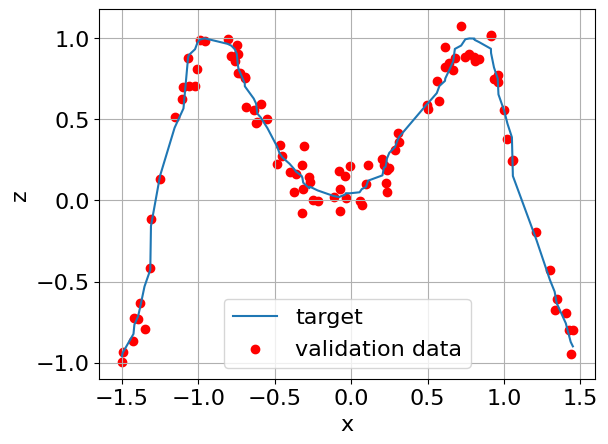

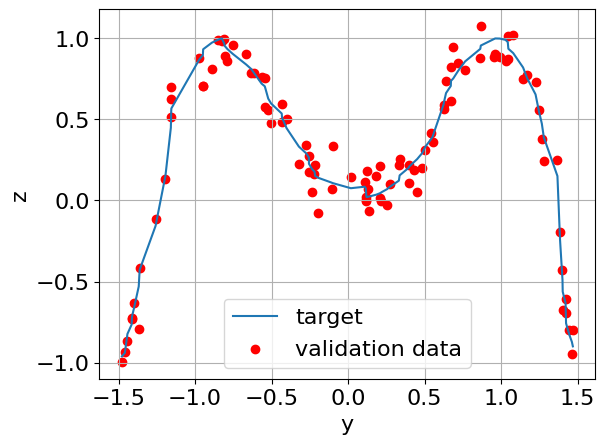

In [2]:
# plot validation and target dataset
plt.plot(x_valid, z_target, label='target')
plt.scatter(x_valid, z_valid, color='r', label='validation data')
plt.xlabel('x')
plt.ylabel('z')
plt.legend() #RIVEDERE SE TENRE QUESTI GRAFICI
plt.grid(True)
plt.show()

plt.plot(y_valid, z_target, label='target')
plt.scatter(y_valid, z_valid, color='r', label='validation data')
plt.xlabel('y')
plt.ylabel('z') #RIVEDERE SE TENRE QUESTI GRAFICI
plt.legend() 
plt.grid(True)
plt.show()


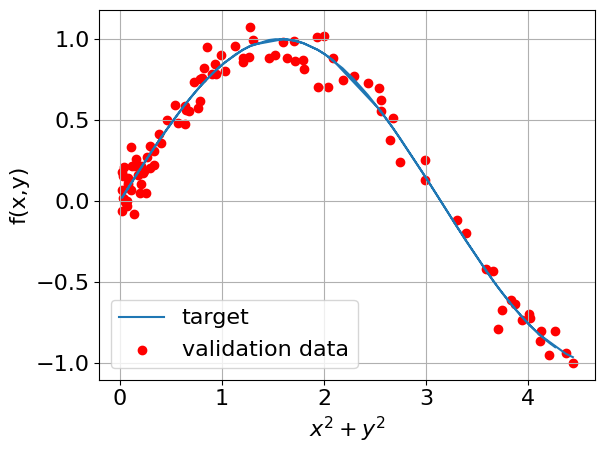

In [3]:
train_data = x_train**2 + y_train**2
val_data = x_valid**2 + y_valid**2


plt.plot(val_data, z_target, label='target')
plt.scatter(val_data, z_valid, color='r', label='validation data')
plt.xlabel('$x^2+y^2$')
plt.ylabel('f(x,y)')
plt.legend()
plt.grid(True)
plt.show()


def model():
    model = tf.keras.Sequential()
    model.add(Dense(256,'relu', input_shape=(1,)))
    model.add(Dense(128,'relu'))
    model.add(Dense(64,'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    
   
    history = model.fit(train_data,z_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(val_data, z_valid))
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    return model

Epoch 1/30


2023-06-08 14:16:31.554504: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-08 14:16:31.554592: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-06-08 14:16:31.556448: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


32/32 [==============================] - 0s 4ms/step - loss: 0.2891 - mse: 0.2891 - val_loss: 0.5050 - val_mse: 0.5050
Epoch 2/30
32/32 [==============================] - 0s 1ms/step - loss: 0.1681 - mse: 0.1681 - val_loss: 0.2720 - val_mse: 0.2720
Epoch 3/30
32/32 [==============================] - 0s 1ms/step - loss: 0.0779 - mse: 0.0779 - val_loss: 0.0803 - val_mse: 0.0803
Epoch 4/30
32/32 [==============================] - 0s 1ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 5/30
32/32 [==============================] - 0s 1ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 6/30
32/32 [==============================] - 0s 1ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 7/30
32/32 [==============================] - 0s 1ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 8/30
32/32 [==============================] - 0s 1ms/step - loss: 0.0099 - mse: 0.0099 - val_lo

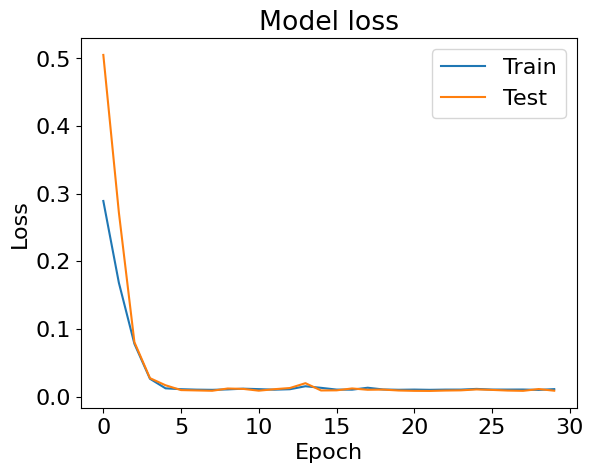

In [4]:
model = model()


4/4 [==============================] - 0s 851us/step


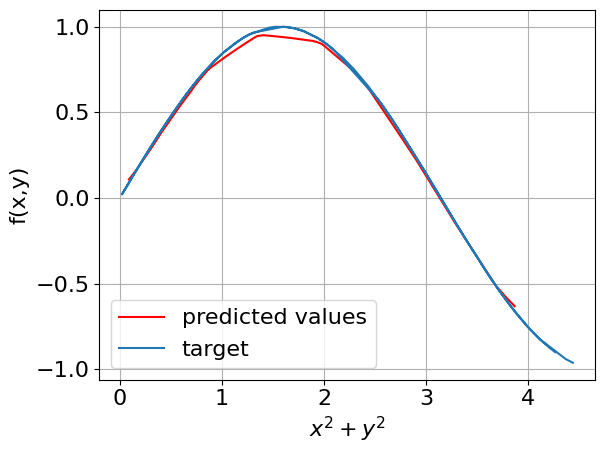

In [5]:
x_predicted = np.random.uniform(-3/2, 3/2, 100)
y_predicted = np.random.uniform(-3/2, 3/2, 100)
xy_predicted = x_predicted**2+y_predicted**2
xy_predicted.sort()
z_predicted = model.predict(xy_predicted)
plt.plot(xy_predicted, z_predicted,color='r',label="predicted values")
plt.plot(val_data, z_target,label="target")
plt.xlabel('$x^2+y^2$')
plt.ylabel('f(x,y)')
plt.grid(True)
plt.legend()
plt.show()

4/4 [==============================] - 0s 825us/step


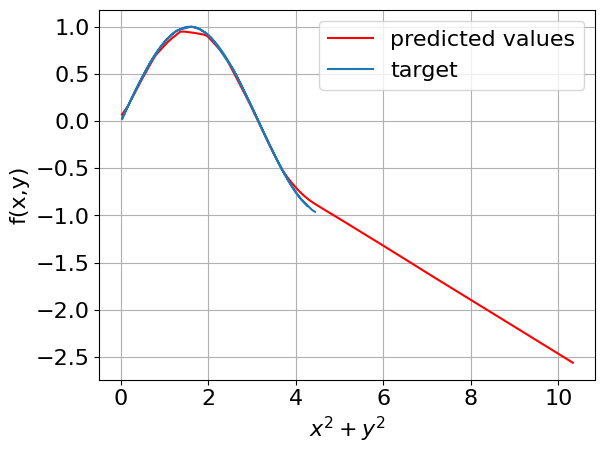

In [6]:
x_predicted = np.random.uniform(-5/2, 5/2, 100)
y_predicted = np.random.uniform(-5/2, 5/2, 100)
xy_predicted = x_predicted**2+y_predicted**2
xy_predicted.sort()
z_predicted = model.predict(xy_predicted)
plt.plot(xy_predicted, z_predicted,color='r',label="predicted values")
plt.plot(val_data, z_target,label="target")
plt.xlabel('$x^2+y^2$')
plt.ylabel('f(x,y)')
plt.grid(True)
plt.legend()
plt.show()

Quindi in questo notebook si è ridotto lo studio di una funzione a due variabile a quello di una funzione ad una variabile (i.e. $r^2 = x^2+y^2$), dopo di che si è creato un modello che riuscissea riprodurre questa funzione, come negli esercizi precedenti nell'intervallo di train si vede che la funzione approssima bene la funzione reale, ma usciti dall'intevallo predefinito il modello cessa di essere accurato.